In [2]:
# MIT License
# 
# Copyright (c) 2021 MiscellaneousStuff
# 
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
# 
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
# 
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

#### 데이터셋 수집 및 전처리 과정

#### 각 티어별 경기 아이디 리스트 받아오기

In [10]:
from autoLeague.dataset.generator import DataGenerator as dg

In [11]:
dg.__init__(dg, api_key='RGAPI-1a1d24de-0002-4894-85cc-6deaf6ec560e' , count=20)

In [ ]:
matchIds_challenger

In [14]:
# 챌린저 300명, 그마 700명 경기 수집
# matchIds_challenger  = dg.get_tier_matchIds(dg, queue='RANKED_SOLO_5x5', tier='CHALLENGER', division='I' , max_ids=100, patch_start_datetime='2023.10.26')
# matchIds_grandmaster = dg.get_tier_matchIds(dg, queue='RANKED_SOLO_5x5', tier='GRANDMASTER', division='I' , max_ids=700, patch_start_datetime='2023.10.26')
matchIds_master = dg.get_tier_matchIds(dg, queue='RANKED_SOLO_5x5', tier='MASTER', division='I' , max_ids=5000, patch_start_datetime='2023.10.26')
# matchid 합치기
# matchIds_challenger.extend(matchIds_grandmaster)
# matchIds_challenger.extend(matchIds_master)

matchIds_master = list(set(matchIds_master))

Gathering summoner_ids by Riot_API... : 100%|=======================================| 5000/5000 [22:53<00:00,  3.64it/s]
Gathering puuids by Riot_API from summoner_ids... : 100%|=========================| 5000/5000 [1:19:26<00:00,  1.05it/s]


In [15]:
matchIds_challenger = list(set(matchIds_master) - set(matchIds_challenger))

In [16]:
len(matchIds_challenger)

3387

#### 위에서 받아온 경기 아이디들에 대해서 리플레이 파일 저장하기

In [17]:
from autoLeague.dataset.downloader import ReplayDownlader as rd

# must run lol client
rd.__init__(rd)
rd.set_replays_dir(rd,folder_dir = r'C:\Users\김성윤\Documents\League of Legends\Replays')

fkEeIkdi8vDaENuKaifrrg


In [18]:
from tqdm import tqdm
import time

for matchId in tqdm(matchIds_challenger[:1000], 
                    desc = 'Gathering Replay_files(.rofl) from LoL Client... ', ## 진행률 앞쪽 출력 문장
                    ncols = 130, ## 진행률 출력 폭 조절
                    ascii = ' =', 
                    leave=True):
    
    try: #시즌 지난 경기면 패스
        rd.download(rd, matchId)
        time.sleep(7)
    except:
        pass

Gathering Replay_files(.rofl) from LoL Client... : 100%|====================================| 1000/1000 [1:57:30<00:00,  7.05s/it]


#### 리플레이 실행 => 미니맵 이미지 시퀀스 저장

In [2]:
from autoLeague.bin.utils import Utils as ut
from autoLeague.replays.scraper import ReplayScraper as rs
from autoLeague.replays.editor import ImageEditor as ie

import os
import json
import requests
import time
import pyautogui

rs.__init__(rs, game_dir = r'C:\Riot Games\League of Legends\Game',
            replay_dir = r'C:\Users\김성윤\Documents\League of Legends\Replays',
            dataset_dir = r'C:\Users\김성윤\Documents\League of Legends\Dataset',
            scraper_dir = r'C:\Users\김성윤\Desktop\pyLoL\pyLoL\autoLeague\replays',
            replay_speed=40,
            region="KR")

ie.__init__(ie,dataset_dir=r'C:\Users\김성윤\Desktop\pyLoL')

files = os.listdir(rs.get_replay_dir(rs))
replays = [file for file in files if file.endswith(".rofl")]
len(replays)

1000

In [3]:
# run_client(self, replay_path, start, end, speed, paused)
from tqdm import tqdm

for replay in tqdm(replays[402:566],
                    desc = 'Extracting Replay_Minimaps from LoL Client... ', ## 진행률 앞쪽 출력 문장
                    ncols = 200, ## 진행률 출력 폭 조절
                    ascii = ' =', 
                    leave=True
                    ):
    
    rs.run_client(rs,
                  replay_path = rf'{rs.get_replay_dir(rs)}\{replay}', 
                  gameId = replay.split('.')[0],
                  start=5*60 - 5, 
                  end=25*60 - 5, 
                  speed=10, 
                  paused=False, 
                  team="All")

    # rs.run_client(rs,
    #               replay_path = rf'{rs.get_replay_dir(rs)}\{replay}', 
    #               gameId = replay.split('.')[0],
    #               start=5*60 - 5, 
    #               end=15*60 + 5, 
    #               speed=10, 
    #               paused=False, 
    #               team="Red")
    
    # rs.run_client(rs,
    #               replay_path = rf'{rs.get_replay_dir(rs)}\{replay}', 
    #               gameId = replay.split('.')[0],
    #               start=5*60 - 5, 
    #               end=15*60 + 5, 
    #               speed=10, 
    #               paused=False, 
    #               team="Blue")

Extracting Replay_Minimaps from LoL Client... : 100%|==============================================================================================================| 164/164 [5:42:06<00:00, 125.16s/it]


In [ ]:
#### 데이터 전처리

from autoLeague.preprocess.ocr_center_window import OcrCenter as oc
oc.__init__(oc, project_folder_dir = r'C:\Users\김성윤\Desktop\pyLoL')
oc.get_ocr(oc)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


['KR-6666713501']
C:\Users\김성윤\Desktop\pyLoL\KR-6666713501\All
['0_team_kda.png', '1_team_kda.png', '2_team_kda.png', '3_team_kda.png', '4_team_kda.png', '5_team_kda.png']


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


해당 프레임에서 kda, cs 
 [{'K/D/A': ['3', '2', '2'], 'CS': 103}, {'K/D/A': ['0', '2', '2'], 'CS': 52}, {'K/D/A': ['5', '1', '4'], 'CS': 52}, {'K/D/A': ['4', '4', '1'], 'CS': 64}, {'K/D/A': ['0', '2', '1'], 'CS': 68}, {'K/D/A': ['2', '3', '0'], 'CS': 77}, {'K/D/A': ['6', '4', '0'], 'CS': 87}, {'K/D/A': ['5', '2', '2'], 'CS': 73}, {'K/D/A': ['0', '5', '8'], 'CS': 16}, {'K/D/A': ['3', '3', '5'], 'CS': 13}]


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


해당 프레임에서 kda, cs 
 [{'K/D/A': ['3', '2', '2'], 'CS': 107}, {'K/D/A': ['0', '2', '2'], 'CS': 52}, {'K/D/A': ['5', '1', '4'], 'CS': 56}, {'K/D/A': ['4', '4', '1'], 'CS': 64}, {'K/D/A': ['0', '2', '1'], 'CS': 68}, {'K/D/A': ['2', '3', '0'], 'CS': 80}, {'K/D/A': ['6', '4', '0'], 'CS': 87}, {'K/D/A': ['5', '2', '2'], 'CS': 73}, {'K/D/A': ['0', '5', '8'], 'CS': 16}, {'K/D/A': ['3', '3', '5'], 'CS': 13}]


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


해당 프레임에서 kda, cs 
 [{'K/D/A': ['3', '2', '2'], 'CS': 108}, {'K/D/A': ['0', '2', '2'], 'CS': 53}, {'K/D/A': ['5', '1', '4'], 'CS': 60}, {'K/D/A': ['4', '4', '1'], 'CS': 68}, {'K/D/A': ['0', '2', '1'], 'CS': 72}, {'K/D/A': ['2', '3', '0'], 'CS': 80}, {'K/D/A': ['6', '4', '0'], 'CS': 87}, {'K/D/A': ['5', '2', '2'], 'CS': 77}, {'K/D/A': ['0', '5', '8'], 'CS': 16}, {'K/D/A': ['3', '3', '5'], 'CS': 13}]


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


해당 프레임에서 kda, cs 
 [{'K/D/A': ['3', '2', '2'], 'CS': 110}, {'K/D/A': ['0', '2', '2'], 'CS': 53}, {'K/D/A': ['5', '1', '4'], 'CS': 62}, {'K/D/A': ['4', '4', '1'], 'CS': 68}, {'K/D/A': ['0', '2', '1'], 'CS': 74}, {'K/D/A': ['2', '3', '0'], 'CS': 80}, {'K/D/A': ['6', '4', '0'], 'CS': 87}, {'K/D/A': ['5', '2', '2'], 'CS': 77}, {'K/D/A': ['0', '5', '8'], 'CS': 16}, {'K/D/A': ['3', '3', '5'], 'CS': 13}]


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


해당 프레임에서 kda, cs 
 [{'K/D/A': ['3', '2', '2'], 'CS': 111}, {'K/D/A': ['0', '2', '2'], 'CS': 54}, {'K/D/A': ['5', '1', '4'], 'CS': 65}, {'K/D/A': ['4', '5', '2'], 'CS': 68}, {'K/D/A': ['1', '3', '1'], 'CS': 74}, {'K/D/A': ['2', '3', '0'], 'CS': 80}, {'K/D/A': ['6', '4', '0'], 'CS': 90}, {'K/D/A': ['5', '2', '2'], 'CS': 77}, {'K/D/A': ['0', '5', '8'], 'CS': 18}, {'K/D/A': ['4', '3', '5'], 'CS': 17}]
해당 프레임에서 kda, cs 
 [{'K/D/A': ['3', '2', '2'], 'CS': 114}, {'K/D/A': ['0', '2', '2'], 'CS': 54}, {'K/D/A': ['5', '1', '4'], 'CS': 65}, {'K/D/A': ['4', '5', '2'], 'CS': 68}, {'K/D/A': ['1', '3', '1'], 'CS': 74}, {'K/D/A': ['2', '3', '0'], 'CS': 80}, {'K/D/A': ['6', '4', '0'], 'CS': 92}, {'K/D/A': ['5', '2', '2'], 'CS': 77}, {'K/D/A': ['0', '5', '8'], 'CS': 19}, {'K/D/A': ['4', '3', '5'], 'CS': 17}]


In [ ]:
TIERS = ['CHALLENGER', 'MASTER', 'DIAMOND III', 'GOLD III']

#### 흑백으로 전처리 (+ threshing)

In [ ]:
from autoLeague.replays.editor import ImageEditor as ie

# 해당 리플레이 폴더가 있는 곳
ie.__init__(self=ie,dataset_dir=rf'C:\dataset')
ie.run_editor(ie , team='Red')
ie.run_editor(ie , team='Blue')

['KR-6729286331', 'KR-6729309863', 'KR-6729391340', 'KR-6729527624', 'KR-6729545954', 'KR-6729563729', 'KR-6729613333', 'KR-6729619650', 'KR-6729668299', 'KR-6729770806', 'KR-6729849233', 'KR-6729891097', 'KR-6729935229', 'KR-6729968092', 'KR-6730012001', 'KR-6730033444', 'KR-6730046486', 'KR-6730051792', 'KR-6730089807', 'KR-6730098133', 'KR-6730104168', 'KR-6730165482', 'KR-6730186203', 'KR-6730195156', 'KR-6730200286', 'KR-6730279980', 'KR-6730289170', 'KR-6730340666', 'KR-6730356080', 'KR-6730368393', 'KR-6730400351', 'KR-6730468267', 'KR-6730473946', 'KR-6730507477', 'KR-6730576290', 'KR-6730620595', 'KR-6730633794', 'KR-6730635238', 'KR-6730683020', 'KR-6730693448', 'KR-6730705263', 'KR-6730721023', 'KR-6730743069', 'KR-6730747220', 'KR-6730782896', 'KR-6730806127']


100%|██████████| 46/46 [01:57<00:00,  2.56s/it]


['KR-6729286331', 'KR-6729309863', 'KR-6729391340', 'KR-6729527624', 'KR-6729545954', 'KR-6729563729', 'KR-6729613333', 'KR-6729619650', 'KR-6729668299', 'KR-6729770806', 'KR-6729849233', 'KR-6729891097', 'KR-6729935229', 'KR-6729968092', 'KR-6730012001', 'KR-6730033444', 'KR-6730046486', 'KR-6730051792', 'KR-6730089807', 'KR-6730098133', 'KR-6730104168', 'KR-6730165482', 'KR-6730186203', 'KR-6730195156', 'KR-6730200286', 'KR-6730279980', 'KR-6730289170', 'KR-6730340666', 'KR-6730356080', 'KR-6730368393', 'KR-6730400351', 'KR-6730468267', 'KR-6730473946', 'KR-6730507477', 'KR-6730576290', 'KR-6730620595', 'KR-6730633794', 'KR-6730635238', 'KR-6730683020', 'KR-6730693448', 'KR-6730705263', 'KR-6730721023', 'KR-6730743069', 'KR-6730747220', 'KR-6730782896', 'KR-6730806127']


100%|██████████| 46/46 [02:00<00:00,  2.61s/it]


In [ ]:
folder_dir_list = os.listdir('C:\dataset_final\CHALLENGER II')

import os
import shutil

dir_path = "C:\dataset_final\CHALLENGER II"

for folder in folder_dir_list:
    if os.path.exists(rf'{dir_path}\{folder}\Blue\black'):
        shutil.rmtree(rf'{dir_path}\{folder}\Blue\black')
    if os.path.exists(rf'{dir_path}\{folder}\Red\black'):
        shutil.rmtree(rf'{dir_path}\{folder}\Red\black')

#### 각 시퀀스별로 379 개가 되게 설정

In [ ]:
'''folder_dir_list = os.listdir('C:\dataset_final\CHALLENGER II')

import os
import shutil

dir_path = "C:\dataset_final\CHALLENGER II"

for folder in folder_dir_list:
    if os.path.exists(rf'{dir_path}\{folder}\Blue\black'):
        shutil.rmtree(rf'{dir_path}\{folder}\Blue\black')
    if os.path.exists(rf'{dir_path}\{folder}\Red\black'):
        shutil.rmtree(rf'{dir_path}\{folder}\Red\black')'''

In [ ]:
from autoLeague.replays.editor import ImageEditor as ie

ie.fit_frame_length(ie, r'C:\dataset' , 240)   #무결하다면, 아무 출력이 없을 것.

#### 각 경기들에 대해서 각 분당 K,D,A,Obj 저장 (csv)

In [ ]:
from autoLeague.dataset.riotapi import RiotAPI as ra
import os

matchIds = [filename.replace('-','_') for filename in os.listdir('C:\dataset')]
ra.__init__(ra, api_key='RGAPI-1a1d24de-0002-4894-85cc-6deaf6ec560e')
ra.writeCSVfile(ra, matchIds)

100%|██████████| 97/97 [00:50<00:00,  1.94it/s]

csv write complete


#### csv 파일 분석 및 정규화(min-max정규화)

In [ ]:
import pandas as pd
df = pd.read_csv(r'C:\Users\김성윤\Desktop\pyLoL\riot_api_dataset.csv')
df

,matchID,블루킬0,블루킬1,블루킬2,블루킬3,블루킬4,블루킬5,블루킬6,블루킬7,블루킬8,...,레드오브젝0,레드오브젝1,레드오브젝2,레드오브젝3,레드오브젝4,레드오브젝5,레드오브젝6,레드오브젝7,레드오브젝8,레드오브젝9
0,[[ 0 0 0 0 -163...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[[ -1 1 0 0 -155...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[[ 0 0 0 0 1041 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[[ -1 1 0 0 -530...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[[ 0 0 0 0 231...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,[[ 0 0 0 0 534 -...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,[[ -3 3 -7 0 -986...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,[[ 0 0 0 0 -965...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,[[ 0 0 0 0 2404...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,블루킬0,블루킬1,블루킬2,블루킬3,블루킬4,블루킬5,블루킬6,블루킬7,블루킬8,블루킬9,...,레드오브젝0,레드오브젝1,레드오브젝2,레드오브젝3,레드오브젝4,레드오브젝5,레드오브젝6,레드오브젝7,레드오브젝8,레드오브젝9
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np

# Read the CSV file
df = pd.read_csv(r'C:\Users\김성윤\Desktop\pyLoL\riot_api_dataset.csv')

# List the columns you want to normalize
columns_to_normalize = ['column_1', 'column_2', 'column_3']  # Replace these with your specific column names

# Get the min and max values across the specified columns
min_value = df[columns_to_normalize].min().min()
max_value = df[columns_to_normalize].max().max()

# Normalize only the specified columns using the single min and max value
normalized_df = df.copy()
normalized_df[columns_to_normalize] = df[columns_to_normalize].apply(lambda x: (x - min_value) / (max_value - min_value))

# Save the normalized DataFrame to a new CSV file (optional)
normalized_df.to_csv('normalized_data.csv', index=False)

# Print the normalized DataFrame
print(normalized_df)

,matchID,블루킬0,블루킬1,블루킬2,블루킬3,블루킬4,블루킬5,블루킬6,블루킬7,블루킬8,...,레드오브젝0,레드오브젝1,레드오브젝2,레드오브젝3,레드오브젝4,레드오브젝5,레드오브젝6,레드오브젝7,레드오브젝8,레드오브젝9
0,KR_6415876608,0.166667,0.2,0.333333,0.166667,0.000000,0.000000,0.2,0.333333,0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
1,KR_6415928037,0.166667,0.2,0.500000,0.500000,0.500000,0.000000,0.4,0.000000,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,KR_6416050723,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,KR_6416080777,0.000000,0.0,0.500000,0.000000,0.000000,0.000000,0.2,0.166667,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,KR_6416156445,0.500000,0.4,0.166667,0.000000,0.166667,0.166667,0.2,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,KR_6451768607,0.000000,0.2,0.166667,0.166667,0.000000,0.166667,0.2,0.000000,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2060,KR_6451772923,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0
2061,KR_6451782391,0.166667,0.0,0.333333,0.333333,0.000000,0.166667,0.0,0.000000,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
2062,KR_6451795880,0.000000,0.4,0.333333,0.166667,0.000000,0.166667,0.4,0.166667,0.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# 챌린저 유저 경기분석 결과 저장
# team 100 = blue , team 200 = red , team 300 = ai
# 여기 파라미터이름을 좀 바보같이 지어버림,,,,

from autoLeague.dataset.calculator import AreaCalculator as ac

ac.__init__(ac,project_folder_dir='C:\dataset_final' , tier='CHALLENGER II')
ac.get_each_Vision_Area_Per_Tier(ac, project_folder_dir='C:\dataset_final' , tier='CHALLENGER II')

2276


100%|██████████| 2064/2064 [6:58:48<00:00, 12.17s/it]  

Done!


#### ConvLSTM Model 

In [ ]:
import numpy as np

# 리스트의 각 원소가 순차적으로 누적한다.
def transfomList(original_list):
    original_list = original_list
    new_list = []

    running_sum = 0
    for value in original_list:
        running_sum += value
        new_list.append(running_sum)

    return new_list

# 두 리스트의 차이를 반환한다. ( 블루팀 - 레드팀 )
def subtractList(blue_list, red_list):

    result = [a - b for a, b in zip(blue_list, red_list)]

    return result

def getMatchData(matchId):
    data = requests.get(f"https://asia.api.riotgames.com/lol/match/v5/matches/{matchId}/timeline?api_key=RGAPI-1a1d24de-0002-4894-85cc-6deaf6ec560e").json()
    #### 블루팀 participantId 1 ~ 5 // 레드팀 participantId 6 ~ 10
    BLUE_IDs = [1,2,3,4,5]
    RED_IDs = [6,7,8,9,10]
    #### 여기는 프레임 인덱스가 N 일때, 실제 그 프레임이 담는 시간대는 N-1 분 0초부터 N-1 분 59초까지임
    #### 따라서 5분부터 15분 0초까지의 정보는 프레임 6분부터 15까지이다.
    frame_5_to_15 = data['info']['frames'][6:16]
    
    # (해당 시간대에서) 각 팀별 킬 수, 어시스트 수, 누적 대형 오브젝트 처치 수 
    BLUE_KILLS,BLUE_DEATHS,BLUE_ASSISTS,BLUE_OBJECTS,BLUE_GOLDS,BLUE_EXPERIENCES  = [],[],[],[],[],[]   # 참고로 여기서는 각 챔피언들의 어시스트 합
    RED_KILLS,RED_DEATHS,RED_ASSISTS,RED_OBJECTS,RED_GOLDS,RED_EXPERIENCES = [],[],[],[],[],[]



    for frame in frame_5_to_15:

        blue_kills,blue_deaths,blue_assists,blue_objects,blue_golds,blue_experiences  = 0,0,0,0,0,0
        red_kills,red_deaths,red_assists,red_objects,red_golds,red_experiences = 0,0,0,0,0,0


        for event in frame['events']:

            if event['type'] == "CHAMPION_KILL":            # KILL, DEATH, ASSIST
                if event['killerId'] in BLUE_IDs:
                    blue_kills += 1
                if event['killerId'] in RED_IDs:
                    red_kills += 1
                if event['victimId'] in BLUE_IDs:
                    blue_deaths += 1
                if event['victimId'] in RED_IDs:
                    red_deaths += 1
                if event.get("assistingParticipantIds") != None:
                    for assistId in event.get("assistingParticipantIds"):
                        if assistId in BLUE_IDs:
                            blue_assists += 1
                        if assistId in RED_IDs:
                            red_assists += 1

            if event['type'] == "ELITE_MONSTER_KILL":       # ELITE MONSTER KILL
                if event['killerTeamId'] == 100:
                    blue_objects += 1
                else:
                    red_objects += 1
        

        for index in frame['participantFrames']:
            if int(index)  <= 5:
                blue_golds += frame['participantFrames'][index]['totalGold']
                blue_experiences += frame['participantFrames'][str(index)]['xp']
            else:
                red_golds += frame['participantFrames'][index]['totalGold']
                red_experiences += frame['participantFrames'][index]['xp']

            


        BLUE_KILLS.append(blue_kills)
        BLUE_DEATHS.append(blue_deaths)
        BLUE_ASSISTS.append(blue_assists)
        BLUE_OBJECTS.append(blue_objects)
        BLUE_GOLDS.append(blue_golds)
        BLUE_EXPERIENCES.append(blue_experiences)

        # 누적 횟수로 전환
        BLUE_KILLS = transfomList(BLUE_KILLS)
        BLUE_DEATHS = transfomList(BLUE_DEATHS)
        BLUE_ASSISTS = transfomList(BLUE_ASSISTS)
        BLUE_OBJECTS = transfomList(BLUE_OBJECTS)
        BLUE_GOLDS = transfomList(BLUE_GOLDS)
        BLUE_EXPERIENCES = transfomList(BLUE_EXPERIENCES)

        RED_KILLS.append(red_kills)
        RED_DEATHS.append(red_deaths)
        RED_ASSISTS.append(red_assists)
        RED_OBJECTS.append(red_objects)
        RED_GOLDS.append(red_golds)
        RED_EXPERIENCES.append(red_experiences)

        # 누적 횟수로 전환
        RED_KILLS = transfomList(RED_KILLS)
        RED_DEATHS = transfomList(RED_DEATHS)
        RED_ASSISTS = transfomList(RED_ASSISTS)
        RED_OBJECTS = transfomList(RED_OBJECTS)
        RED_GOLDS = transfomList(RED_GOLDS)
        RED_EXPERIENCES = transfomList(RED_EXPERIENCES)


        # 팀 차이 계산

        DIFF_KILLS = subtractList(BLUE_KILLS,RED_KILLS)
        DIFF_DEATHS = subtractList(BLUE_DEATHS,RED_DEATHS)
        DIFF_ASSISTS = subtractList(BLUE_ASSISTS,RED_ASSISTS)
        DIFF_OBJECTS = subtractList(BLUE_OBJECTS,RED_OBJECTS)
        DIFF_GOLDS = subtractList(BLUE_GOLDS,RED_GOLDS)
        DIFF_EXPERIENCES = subtractList(BLUE_EXPERIENCES,RED_EXPERIENCES)

            #위 순서대로 리스트 병합
    
    allData = []
    '''allData.append(matchId)

    
    allData.extend(BLUE_KILLS) , allData.extend(BLUE_DEATHS) , allData.extend(BLUE_ASSISTS) , allData.extend(BLUE_OBJECTS) , allData.extend(BLUE_GOLDS) , allData.extend(BLUE_EXPERIENCES)
    allData.extend(RED_KILLS) , allData.extend(RED_DEATHS) , allData.extend(RED_ASSISTS) , allData.extend(RED_OBJECTS) , allData.extend(RED_GOLDS) , allData.extend(RED_EXPERIENCES)'''

    allData.extend(DIFF_KILLS) , allData.extend(DIFF_DEATHS) , allData.extend(DIFF_ASSISTS) , allData.extend(DIFF_OBJECTS) , allData.extend(DIFF_GOLDS) , allData.extend(DIFF_EXPERIENCES)

    #allData.append(DIFF_KILLS) , allData.append(DIFF_DEATHS) , allData.append(DIFF_ASSISTS) , allData.append(DIFF_OBJECTS) , allData.append(DIFF_GOLDS) , allData.append(DIFF_EXPERIENCES)

    # Convert the 2D list to a NumPy array and transpose it to have shape (time_steps, features)
    #data_np = np.array(allData).transpose()

    # Add an extra dimension for samples, resulting in shape (samples, time_steps, features)
    # data_np = np.reshape(data_np, (10, 6))
    return allData

    #return allData

#### 데이터 전처리 (1분간의 평균 및 표준화)

In [ ]:
import cv2

def read_image(path):
    # Read the image
    image = cv2.imread(path)

    blue_jug_near_baron = [(370,400),(200,300),(135,165),(100,200),(100,550),(150,550),(200,575)]
    blue_jug_near_drake = [(840-415,830-365),(840-350,830-325),(840-300,830-200),(840-210,830-210),(840-200,830-110),(840-230,830-100),(840-550,830-100),(840-550,830-150),(840-575,830-200),(840-415,830-365)]
    red_jug_near_baron = [(415,365),(350,325),(300,200),(210,210),(200,110),(230,100),(550,100),(550,150),(575,200),(415,365)]
    red_jug_near_drake = [(840-370,830-400),(840-200,830-300),(840-135,830-165),(840-100,830-200),(840-100,830-550),(840-150,830-550),(840-200,830-575),(840-370,830-400)]
    river_near_baron = [(370,400),(200,300),(135,165),(200,110),(210,210),(300,200),(350,325),(415,365),(370,400)]
    river_near_drake = [(840-370,830-400),(840-200,830-300),(840-135,830-165),(840-200,830-110),(840-210,830-210),(840-300,830-200),(840-350,830-325),(840-415,830-365),(840-370,830-400)]
    
    regions = {
        'blue_jug_near_baron': blue_jug_near_baron,
        'blue_jug_near_drake': blue_jug_near_drake,
        'red_jug_near_baron': red_jug_near_baron,
        'red_jug_near_drake': red_jug_near_drake,
        'river_near_baron': river_near_baron,
        'river_near_drake': river_near_drake
    }

    regions = [blue_jug_near_baron, blue_jug_near_drake, red_jug_near_baron, red_jug_near_drake, river_near_baron, river_near_drake]

    # Create a blank mask image of the same size as the original image
    mask = np.zeros(image.shape[:2], dtype=np.uint8)

    # Fill each region with white (255) on the mask image
    for coordinates in regions:
        cv2.fillPoly(mask, np.array([coordinates], dtype=np.int32), 255)

    # Apply the mask to the original image
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    # masked_image = cv2.resize(masked_image, dsize=(200, 200))

    return masked_image//(1*2)

def divide_list(lst, num_divisions):
    division_size = len(lst) // num_divisions
    remainder = len(lst) % num_divisions
    divisions = []

    start = 0
    for i in range(num_divisions):
        end = start + division_size + (1 if remainder > 0 else 0)
        divisions.append(lst[start:end])
        start = end
        if remainder > 0:
            remainder -= 1

    return divisions

# Your list of length 379
your_list = list(range(1, 380))

# Divide the list into 10 divisions
divided_list = divide_list(your_list, 1)

# Print the divided list
for i, division in enumerate(divided_list):
    print(f"Division {i + 1}: {division}")

Division 1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import numpy as np

def extract_number_from_filename(filename):
    # Extract numbers from the filename
    number = int("".join(filter(str.isdigit, filename)))
    return number

def add_images(images):
    summed_image = read_image(images[0])
    for image in images[1:]:
        summed_image += read_image(image)

    # summed_image = cv2.resize(summed_image, dsize=(100, 100))
    plt.imshow(summed_image)
    return summed_image

# 기존 폴더에 있던 이미지들을 전처리 후, 다른 디렉토리에 옮긴다.
# top_level_folder_dir : 최상위 폴더 디렉토리 (예시 : C:\dataset_final\CHALLENGER)
# interval : 나눌 시간대, seconds (단위는 초) , 해당 시간대에 맞게 묶어서 이미지들의 원소들을 합산 평균할 것임.
# total_interval : 해당 데이터셋의 전체 타임 시간대 (여기서는 default 600s == 10분)
def sum_and_avg_images(top_level_folder_dir, start, end, interval, total_interval=600):

    # 옮겨서 저장할 최상위 위치 
    try:
        os.mkdir(r'C:\dataset_final\CHALLENGER_S')
    except:
         pass
    target_top_level_dir = r'C:\dataset_final\CHALLENGER_S'

    # 생성되는 그룹 개수
    n_group = total_interval // interval
    # 1 덩어리로 묶을 파일 갯수 
    
    # chunk_size = 379//n_group

    # match 폴더이름들 받아오기
    match_ids = [file for file in os.listdir(r'C:\dataset_final\CHALLENGER') if file.startswith('KR')]

    # print(match_ids)

    for match_id in tqdm(match_ids[start:end]):
            blue_dir = os.path.join(top_level_folder_dir, match_id, 'Blue', 'black')
            red_dir = os.path.join(top_level_folder_dir, match_id, 'Red', 'black')

            os.mkdir(os.path.join(target_top_level_dir, match_id))
            os.mkdir(os.path.join(target_top_level_dir, match_id, 'Blue'))
            os.mkdir(os.path.join(target_top_level_dir, match_id, 'Blue', 'black'))
            os.mkdir(os.path.join(target_top_level_dir, match_id, 'Red'))
            os.mkdir(os.path.join(target_top_level_dir, match_id, 'Red', 'black'))

            os.mkdir(os.path.join(target_top_level_dir, match_id, 'Other'))
            os.mkdir(os.path.join(target_top_level_dir, match_id, 'Other', 'black'))

            '''target_blue_dir = os.path.join(target_top_level_dir, match_id, 'Blue', 'black')
            target_red_dir = os.path.join(target_top_level_dir, match_id, 'Red', 'black')'''

            target_other_dir = os.path.join(target_top_level_dir, match_id, 'Other', 'black')

            #blue_image_paths = sorted([os.path.join(blue_dir, img) for img in os.listdir(blue_dir) if os.listdir(blue_dir).index(img)] )
            blue_image_paths = sorted([os.path.join(blue_dir, img) for img in os.listdir(blue_dir)] , key=extract_number_from_filename)
            # Divide the list into 10 divisions
            divided_list_blue = divide_list(blue_image_paths, 379)

            '''# Print the divided list
            for i, division in enumerate(divided_list_blue):
                #print(f"Division {i + 1}: {division}")
                cv2.imwrite(rf'{target_blue_dir}\{i}.png', add_images(division))'''
                

            red_image_paths = sorted([os.path.join(red_dir, img) for img in os.listdir(red_dir)] , key=extract_number_from_filename) 
            # Divide the list into 10 divisions
            divided_list_red = divide_list(red_image_paths, 379)
            '''# Print the divided list
            for i, division in enumerate(divided_list_red):
                #print(f"Division {i + 1}: {division}")
                cv2.imwrite(rf'{target_red_dir}\{i}.png', add_images(division))'''
               

            
            
            # Print the divided list
            for i, (division_blue, division_red) in enumerate(zip(divided_list_blue,divided_list_red)):
                #print(f"Division {i + 1}: {division}")
                cv2.imwrite(rf'{target_other_dir}\{i}.png', add_images(division_blue) - add_images(division_red) + 127 )  
            

In [ ]:
sum_and_avg_images(r'C:\dataset_final\CHALLENGER', 800, 900 , 60, total_interval=600)

In [ ]:
sum_and_avg_images(r'C:\dataset_final\CHALLENGER', 401, 550 , 60, total_interval=600)

In [ ]:
sum_and_avg_images(r'C:\dataset_final\CHALLENGER', 550, 700 , 60, total_interval=600)

In [ ]:
sum_and_avg_images(r'C:\dataset_final\CHALLENGER', 700, 850 , 60, total_interval=600)

In [ ]:
sum_and_avg_images(r'C:\dataset_final\CHALLENGER', 850, 1000 , 60, total_interval=600)

In [ ]:
##### 응애 라벨링
import os
import requests
import csv
from tqdm import tqdm

def download_labels():

    dir = r'C:\dataset_final\CHALLENGER'
    API_KEY = 'RGAPI-1a1d24de-0002-4894-85cc-6deaf6ec560e'

    matchIds = [file for file in os.listdir(dir) if file.startswith('KR')]
    f = open('labels.csv','a', newline='')
    wr = csv.writer(f)

    wr.writerow(['matchid','label'])

    for matchid in tqdm(matchIds):
        matchid = matchid.replace('-','_')
        is_blue_win =  1 if requests.get(f'https://asia.api.riotgames.com/lol/match/v5/matches/{matchid}?api_key={API_KEY}').json()['info']['teams'][0]['win'] == True else 0

        label = is_blue_win
        # print(matchid,label)
        wr.writerow([matchid,label])
        
   
    f.close()

    print('csv write complete')

In [ ]:
download_labels()

100%|██████████| 2062/2062 [13:41<00:00,  2.51it/s] 

csv write complete


In [ ]:
import os
import tensorflow as tf
import requests
from tqdm import tqdm
from functools import reduce
import pandas as pd

API_KEY = 'RGAPI-1a1d24de-0002-4894-85cc-6deaf6ec560e'

from autoLeague.dataset.riotapi import RiotAPI as ra

ra.__init__(ra , api_key=API_KEY)


import cv2

def max_pooling(img, pool_size):
    # Calculate the new dimensions after Max Pooling
    new_height = img.shape[0] // pool_size
    new_width = img.shape[1] // pool_size

    # Apply Max Pooling using cv2.resize with INTER_NEAREST interpolation
    max_pooled_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_NEAREST)

    return max_pooled_img

###################################################
###################################################
###################################################
###################################################
###################################################
###################################################

def average_pooling(image, kernel_size):
    """
    Perform average pooling on an image using OpenCV.
    
    Args:
        image (numpy.ndarray): An image.
        kernel_size (int): The size of the pooling kernel.
        
    Returns:
        numpy.ndarray: The pooled image.
    """
    return cv2.blur(image, (kernel_size, kernel_size))

# Example usage:
# Load an image (OpenCV loads images as NumPy arrays)
'''image = cv2.imread('path_to_your_image.jpg', cv2.IMREAD_GRAYSCALE)

# Perform average pooling on the image
pooled_image = average_pooling(image, 13)'''

# Save the pooled image
# cv2.imwrite('pooled_image.jpg', pooled_image)

###################################################
###################################################
###################################################
###################################################
###################################################
###################################################

# 게임 유저들의 동선을 시계열로 수집, 반환
def get_champ_movements(matchId):

    data = requests.get(f"https://asia.api.riotgames.com/lol/match/v5/matches/{matchId}/timeline?api_key=RGAPI-1a1d24de-0002-4894-85cc-6deaf6ec560e").json()

    # 해당 경가에서의 Blue 팀 5 ~ 15분까지의 위치 반환
    frames = data['info']['frames']
    for frame in frames[6:16]:
        # 플레이어들 프레임들 (블루 5명, 레드 5명)
        p_frames = frame['participantFrames']

        for p_frame in p_frames:
            print(round(p_frames[p_frame]['position']['x']/16000 , 3), round(p_frames[p_frame]['position']['y']/16000 , 3) )
            
            

    # 해당 경가에서의 Red  팀 5 ~ 15분까지의 위치 반환



# label 을 riot api로 호출하는 것이 아닌, 미리 수집한 데이터프레임에서 읽어오는 방식을 채택하여, http error 를 해결.
# 이전 부분은 주석처리
def get_labels_and_features_from_api(match_id):

    def get_label(matchId):
        df = pd.read_csv('labels.csv')
        return df[df.matchid == matchId]['label']

    match_id = match_id.replace('-','_')
    '''is_blue_win =  1 if requests.get(f'https://asia.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={API_KEY}').json()['info']['teams'][0]['win'] == True else 0'''

    is_blue_win = get_label(match_id)

    label = is_blue_win
    
    # features = getMatchData(match_id)
    return label #, features 

def load_image_pair(blue_path):
    img = tf.io.read_file(blue_path)
    img = tf.image.decode_image(img, channels=1, dtype=tf.float32, expand_animations=False)
    img = tf.image.resize(img, [840, 840]).numpy().astype(np.float64)


    img = img[90:740, 90:740]           # (650,650)
    img = max_pooling(img,13)           # (50,50)
    # img = average_pooling(img , 13)

    img = ( img - 127 )/ 128.0  # Normalize the blue image
    # plt.imshow(img)
    img = tf.expand_dims(img, axis=0)  # Add batch dimension
    
    return img

def extract_number_from_filename(filename):
    # Extract numbers from the filename
    number = int("".join(filter(str.isdigit, filename)))
    return number


import os
import numpy as np
from tensorflow.keras.utils import Sequence

class CustomDataGenerator(Sequence):
    def __init__(self, tier, match_ids, other_folder='Other', n_frames=379, batch_size=1):
        self.tier = tier
        self.match_ids = match_ids
        self.other_folder = other_folder
        self.n_frames = n_frames
        self.batch_size = batch_size

    def __len__(self):
        return len(self.match_ids)

    def __getitem__(self, index):
        match_id = self.match_ids[index]
        other_dir = os.path.join(self.tier, match_id, self.other_folder, 'black')
        other_image_paths = sorted([os.path.join(other_dir, img) for img in os.listdir(other_dir)], key=extract_number_from_filename)

        images = []
        for path in other_image_paths[:self.n_frames]:
            img = load_image_pair(path)
            images.append(img.numpy())

        x = np.stack(images, axis=0)  # Stack 10 frames along the time dimension
        x = np.expand_dims(x, axis=0)  # Add batch dimension
        x = np.squeeze(x, axis=2)  # Remove the unnecessary dimension

        label = get_labels_and_features_from_api(match_id)
        y = np.array([label])

        # print("X shape:", x.shape, "y shape:", y.shape)  # Add this line to print shapes

        return x, y


tier = 'C:\dataset_final\CHALLENGER_S'
match_ids = [filename for filename in os.listdir(tier)]   # ['match_id_1', 'match_id_2', 'match_id_3']  List your match_ids

from sklearn.model_selection import train_test_split
# Split the match_ids into train and validation sets (80% train, 20% validation)
train_match_ids, valid_match_ids = train_test_split(match_ids, test_size=0.2, random_state=42 , shuffle=True)

train_generator = CustomDataGenerator(tier, train_match_ids)
valid_generator = CustomDataGenerator(tier, valid_match_ids)


'''
tier = 'C:\dataset_final\CHALLENGER_S'
match_ids = [filename for filename in os.listdir(tier)]   # ['match_id_1', 'match_id_2', 'match_id_3']  List your match_ids
print(len(match_ids))
dataset = create_dataset(tier, match_ids)'''



"\ntier = 'C:\\dataset_final\\CHALLENGER_S'\nmatch_ids = [filename for filename in os.listdir(tier)]   # ['match_id_1', 'match_id_2', 'match_id_3']  List your match_ids\nprint(len(match_ids))\ndataset = create_dataset(tier, match_ids)"

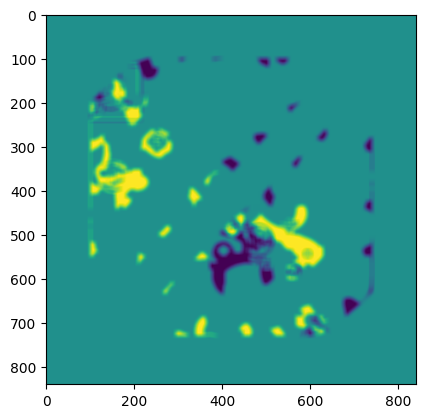

In [ ]:
import matplotlib.pyplot as plt

image_path = r'C:\dataset_final\CHALLENGER_S\KR-6416300268\Other\black\1.png'
img = tf.io.read_file(image_path)
img = tf.image.decode_image(img, channels=1, dtype=tf.float32, expand_animations=False)
img = tf.image.resize(img, [840, 840]).numpy().astype(np.float64)

img = average_pooling(img, 13)


plt.imshow(img)

In [ ]:
import cv2

def max_pooling(img, pool_size):
    # Calculate the new dimensions after Max Pooling
    new_height = img.shape[0] // pool_size
    new_width = img.shape[1] // pool_size

    # Apply Max Pooling using cv2.resize with INTER_NEAREST interpolation
    max_pooled_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_NEAREST)

    return max_pooled_img

# Read the image
image_path = r'C:\dataset_final\CHALLENGER_S\KR-6416300268\Other\black\1.png'
image = cv2.imread(image_path)[90:740, 90:740]

# Max Pool the image
pool_size = 13
max_pooled_image = max_pooling(image, pool_size)

# Display the original and max pooled images
cv2.imshow('Original Image', image)
cv2.imshow('Max Pooled Image', max_pooled_image)

# Wait for a key press and close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import (Dense, Concatenate, ConvLSTM2D, AveragePooling2D, AveragePooling3D, Flatten,
                                     Conv3D, MaxPooling3D, LSTM, BatchNormalization , GlobalAveragePooling2D, Dropout)
from keras.layers import TimeDistributed

# num_features=6, time_steps=10
def build_combined_model(input_shape=(379, 50, 50, 1)):
    # Define the first model (ConvLSTM2D)
    img_input = Input(shape=input_shape)
    
    '''x = MaxPooling3D(pool_size=(1, 4, 4), padding='same')(img_input)
    x = AveragePooling3D(pool_size=(1, 3, 3), padding='same')(x)
    '''
    # Add Conv3D and MaxPooling3D layers near the input
    '''x = Conv3D(filters=1024, kernel_size=(1, 3, 3),padding='same', activation='relu', input_shape=input_shape)(img_input)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(1, 2, 2), padding='same')(x)'''

    x = Conv3D(filters=3, kernel_size=(1, 3, 3),padding='same', activation='relu', input_shape=input_shape)(img_input)
    x = MaxPooling3D(pool_size=(1, 2, 2), padding='same')(x)
    x = BatchNormalization()(x)

    x = ConvLSTM2D(filters=3, kernel_size=(3, 3), padding='same', activation='linear', return_sequences=True)(x)
    x = AveragePooling3D(pool_size=(1, 2, 2), padding='same')(x)
    x = BatchNormalization()(x)

    x = ConvLSTM2D(filters=3, kernel_size=(3, 3), padding='same', activation='linear', return_sequences=True)(x)
    x = AveragePooling3D(pool_size=(1, 2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    
    x = ConvLSTM2D(filters=3, kernel_size=(3, 3), padding='same', activation='linear', return_sequences=False)(x)
    x = AveragePooling2D(pool_size=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)

    #x = GlobalAveragePooling2D()(x)

    x = Flatten()(x)

    x= Dense(90, activation='relu')(x)
    x = BatchNormalization()(x)

    x = Dropout(0.5)(x)

    # Output layer for binary classification
    output = Dense(1, activation='sigmoid')(x)

    print(output)
    # Create the combined model
    model = Model(inputs=img_input, outputs=output)


    return model


# Build the combined model
model = build_combined_model()



KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_13/Sigmoid:0', description="created by layer 'dense_13'")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, ConvLSTM2D, Dense, Flatten, TimeDistributed, AdditiveAttention, Reshape, MaxPooling3D, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Input shape: (batch, time, rows, cols, channels)
input_layer = Input(shape=(379,50,50,1))

# Adding a ConvLSTM layer
x = ConvLSTM2D(filters=8, kernel_size=(2,2), padding='same', return_sequences=True)(input_layer)
x = MaxPooling3D(pool_size=(1, 5, 5), padding='same')(x)
x = BatchNormalization()(x)

# Adding a ConvLSTM layer
x = ConvLSTM2D(filters=16, kernel_size=(2,2), padding='same', return_sequences=True)(x)
x = MaxPooling3D(pool_size=(1, 3, 3), padding='same')(x)
x = BatchNormalization()(x)

# Adding a ConvLSTM layer
x = ConvLSTM2D(filters=32, kernel_size=(3,3), padding='same', return_sequences=True)(x)
x = MaxPooling3D(pool_size=(1, 2, 2), padding='same')(x)
x = BatchNormalization()(x)


# Adding a TimeDistributed layer to apply a same Dense layer to the each temporal slice of an input
timedistributed_layer = TimeDistributed(Flatten())(x)

# Adding an attention layer
attention_layer = AdditiveAttention()([timedistributed_layer, timedistributed_layer])

# Flatten before passing to the final Dense layer
flatten_layer = Flatten()(attention_layer)

# Dense layer 
dense_layer = Dense(1024, activation='relu')(flatten_layer)

# Output layer
output_layer = Dense(1, activation='sigmoid')(dense_layer)

# Create a model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
# model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Model summary
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 379, 50, 50  0           []                               
                                , 1)]                                                             
                                                                                                  
 conv_lstm2d_13 (ConvLSTM2D)    (None, 379, 50, 50,  1184        ['input_7[0][0]']                
                                 8)                                                               
                                                                                                  
 max_pooling3d_12 (MaxPooling3D  (None, 379, 10, 10,  0          ['conv_lstm2d_13[0][0]']         
 )                               8)                                                         

In [ ]:
import wandb
import tensorflow as tf

%env WANDB_API_KEY=43c7c9707887ea6277ac1ff15c5e47f45a42c1ac

from wandb.keras import WandbCallback
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


env: WANDB_API_KEY=43c7c9707887ea6277ac1ff15c5e47f45a42c1ac


True

In [ ]:
import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

import random
import numpy as np
import tensorflow as tf


wandb.init(
    # set the wandb project where this run will be logged
    project="AlphaLoL",

    # track hyperparameters and run metadata with wandb.config
    config={
        #"layer_1": 512,
        #"activation_1": "relu",
        #"dropout": random.uniform(0.01, 0.80),
        #"layer_2": 10,
        #"activation_2": "softmax",
        "optimizer": "Adam",
        "loss": "binary_crossentropy",
        "metric": "accuracy",
        "epoch": 20,
        "batch_size": 4
    }
)

# [optional] use wandb.config as your config
config = wandb.config
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# Compile the model with a binary classification loss function and metric
# combined_model.compile(optimizer=optimizer , loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizer , loss='binary_crossentropy', metrics=['accuracy'])

batch/accuracy,▆▅▄▄▄▃▃▃▃▁▄▃▄▄▃▃▃▃█▅▅▄▄▅▄▄▄▂▃▄▄▄▄▄▄▄▇▅▄▄
batch/batch_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,█▅▅▄▄▄▄▄▃▂▂▃▂▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▃▃▂
epoch/accuracy,▁▁█▄
epoch/epoch,▁▃▆█
epoch/learning_rate,▁▁▁▁
epoch/loss,█▄▁▃
epoch/val_accuracy,▁▁█▁
epoch/val_loss,▁▂▁█
batch/accuracy,0.5


In [ ]:
# Train the model using the data generator
epochs = 60   # Number of epochs, modify this according to your problem
model.fit(train_generator, epochs=epochs, validation_data=valid_generator , batch_size= 4 ,
                    callbacks=[
                      WandbMetricsLogger(log_freq=1),
                      WandbModelCheckpoint("models")
                    ])

Epoch 1/60
715/715 [==============================] - ETA: 0s - loss: 1.7895 - accuracy: 0.5357INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.8s


715/715 [==============================] - 4012s 6s/step - loss: 1.7895 - accuracy: 0.5357 - val_loss: 3.4238 - val_accuracy: 0.5084
Epoch 2/60
715/715 [==============================] - ETA: 0s - loss: 1.0641 - accuracy: 0.5203INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.8s


715/715 [==============================] - 4169s 6s/step - loss: 1.0641 - accuracy: 0.5203 - val_loss: 0.7843 - val_accuracy: 0.5084
Epoch 3/60
715/715 [==============================] - ETA: 0s - loss: 0.9260 - accuracy: 0.4909INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.8s


715/715 [==============================] - 3912s 5s/step - loss: 0.9260 - accuracy: 0.4909 - val_loss: 0.7057 - val_accuracy: 0.4916
Epoch 4/60
715/715 [==============================] - ETA: 0s - loss: 0.9903 - accuracy: 0.5175INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.8s


715/715 [==============================] - 3922s 5s/step - loss: 0.9903 - accuracy: 0.5175 - val_loss: 0.7188 - val_accuracy: 0.5084
Epoch 5/60
715/715 [==============================] - ETA: 0s - loss: 0.7603 - accuracy: 0.5105INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.9s


715/715 [==============================] - 3937s 6s/step - loss: 0.7603 - accuracy: 0.5105 - val_loss: 0.7288 - val_accuracy: 0.5084
Epoch 6/60
715/715 [==============================] - ETA: 0s - loss: 0.8294 - accuracy: 0.4895INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.8s


715/715 [==============================] - 3941s 6s/step - loss: 0.8294 - accuracy: 0.4895 - val_loss: 1.4300 - val_accuracy: 0.4916
Epoch 7/60
715/715 [==============================] - ETA: 0s - loss: 0.8098 - accuracy: 0.5049INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.8s


715/715 [==============================] - 3932s 5s/step - loss: 0.8098 - accuracy: 0.5049 - val_loss: 0.6950 - val_accuracy: 0.5084
Epoch 8/60
715/715 [==============================] - ETA: 0s - loss: 0.7253 - accuracy: 0.4909INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.8s


715/715 [==============================] - 3924s 5s/step - loss: 0.7253 - accuracy: 0.4909 - val_loss: 0.6963 - val_accuracy: 0.4916
Epoch 9/60
715/715 [==============================] - ETA: 0s - loss: 0.8334 - accuracy: 0.4783INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.9s


715/715 [==============================] - 3918s 5s/step - loss: 0.8334 - accuracy: 0.4783 - val_loss: 0.8912 - val_accuracy: 0.4916
Epoch 10/60
715/715 [==============================] - ETA: 0s - loss: 0.7662 - accuracy: 0.4979INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.8s


715/715 [==============================] - 3918s 5s/step - loss: 0.7662 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.5084
Epoch 11/60
715/715 [==============================] - ETA: 0s - loss: 0.7176 - accuracy: 0.4825INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.8s


715/715 [==============================] - 3932s 5s/step - loss: 0.7176 - accuracy: 0.4825 - val_loss: 0.7133 - val_accuracy: 0.5084
Epoch 12/60
715/715 [==============================] - ETA: 0s - loss: 0.8032 - accuracy: 0.5147INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.8s


715/715 [==============================] - 3910s 5s/step - loss: 0.8032 - accuracy: 0.5147 - val_loss: 0.7871 - val_accuracy: 0.5084
Epoch 13/60
715/715 [==============================] - ETA: 0s - loss: 0.7044 - accuracy: 0.5105INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.8s


715/715 [==============================] - 3929s 5s/step - loss: 0.7044 - accuracy: 0.5105 - val_loss: 0.7251 - val_accuracy: 0.4916
Epoch 14/60
715/715 [==============================] - ETA: 0s - loss: 0.8117 - accuracy: 0.4965INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 1.2s


715/715 [==============================] - 5921s 8s/step - loss: 0.8117 - accuracy: 0.4965 - val_loss: 0.6945 - val_accuracy: 0.5084
Epoch 15/60
715/715 [==============================] - ETA: 0s - loss: 0.7044 - accuracy: 0.5371INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 1.2s


715/715 [==============================] - 6268s 9s/step - loss: 0.7044 - accuracy: 0.5371 - val_loss: 0.7186 - val_accuracy: 0.5084
Epoch 16/60
514/715 [====================>.........] - ETA: 24:13 - loss: 0.7052 - accuracy: 0.4767

KeyboardInterrupt: 

In [ ]:
np.log10(1/2)

-0.3010299956639812

In [ ]:
import tensorflow as tf

# Parameters
input_shape = (10, 840, 840, 1)  # Replace this with the shape of your input images
epochs = 10
learning_rate = 0.001

# Compile the combined model
'''combined_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])'''

with tf.device('/GPU:0'):
    # Train the model using the dataset iterator
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        train_dataset_iter, val_dataset_iter = create_dataset_iter(tier, match_ids)

        # Training phase
        for dataset in train_dataset_iter:
            for (x_imgs, x_features), y in dataset:
                x_imgs = tf.expand_dims(x_imgs, axis=0)  # Add batch dimension
                combined_model.train_on_batch([x_imgs, x_features], y)

        # Validation phase
        val_loss = []
        val_acc = []
        for dataset in val_dataset_iter:
            for (x_imgs, x_features), y in dataset:
                x_imgs = tf.expand_dims(x_imgs, axis=0)  # Add batch dimension
                logs = combined_model.test_on_batch([x_imgs, x_features], y)
                val_loss.append(logs[0])
                val_acc.append(logs[1])

        avg_val_loss = sum(val_loss) / len(val_loss)
        avg_val_acc = sum(val_acc) / len(val_acc)
        print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {avg_val_acc:.4f}")

In [ ]:
import os
import tensorflow as tf
import requests
from tqdm import tqdm
from functools import reduce

API_KEY = 'RGAPI-1a1d24de-0002-4894-85cc-6deaf6ec560e'

from autoLeague.dataset.riotapi import RiotAPI as ra

ra.__init__(ra , api_key=API_KEY)


def get_labels_and_features_from_api(match_id):
    match_id = match_id.replace('-','_')
    is_blue_win =  1 if requests.get(f'https://asia.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={API_KEY}').json()['info']['teams'][0]['win'] == True else 0
    label = is_blue_win

    features = getMatchData(match_id)
    return label , features

def load_image_pair(blue_path, red_path):
    blue_img = tf.io.read_file(blue_path)
    blue_img = tf.image.decode_image(blue_img, channels=1, dtype=tf.float32, expand_animations=False)
    blue_img = tf.image.resize(blue_img,(105,105))
    blue_img = blue_img / 255.0  # Normalize the blue image

    # Crop a 100x100 square from the center of the blue image
    # blue_img = tf.image.crop_to_bounding_box(blue_img, 25, 25, 160, 160)
    
    red_img = tf.io.read_file(red_path)
    red_img = tf.image.decode_image(red_img, channels=1, dtype=tf.float32, expand_animations=False)
    red_img = tf.image.resize(red_img,(105,105))
    red_img = red_img / 255.0  # Normalize the red image

    # Crop a 100x100 square from the center of the red image
    # red_img = tf.image.crop_to_bounding_box(red_img, 25, 25, 160, 160)
    
    stacked_img = tf.concat([blue_img, red_img], axis=-1)

    return stacked_img

def extract_number_from_filename(filename):
    # Extract numbers from the filename
    number = int("".join(filter(str.isdigit, filename)))
    return number


def create_dataset_iter(tier, match_ids, blue_folder='Blue', red_folder='Red', n_frames=239, validation_split=0.2):

    num_validation = int(validation_split * len(match_ids))
    train_match_ids = match_ids[num_validation:]
    val_match_ids = match_ids[:num_validation]

    def generate_data(match_ids):
        for match_id in tqdm(match_ids):
            blue_dir = os.path.join(tier, match_id, blue_folder, 'black')
            red_dir = os.path.join(tier, match_id, red_folder, 'black')

            #blue_image_paths = sorted([os.path.join(blue_dir, img) for img in os.listdir(blue_dir) if os.listdir(blue_dir).index(img)] )
            blue_image_paths = sorted([os.path.join(blue_dir, img) for img in os.listdir(blue_dir)] , key=extract_number_from_filename)
            # blue_image_paths = [path for path in blue_image_paths if blue_image_paths.index(path)%3 == 0 ]

            red_image_paths = sorted([os.path.join(red_dir, img) for img in os.listdir(red_dir)] , key=extract_number_from_filename) 
            # red_image_paths = [path for path in red_image_paths if red_image_paths.index(path)%3 == 0 ]

            dataset = tf.data.Dataset.from_tensor_slices((blue_image_paths, red_image_paths))
            dataset = dataset.map(load_image_pair, num_parallel_calls=tf.data.experimental.AUTOTUNE)
            dataset = dataset.batch(n_frames)

            # Fetch label and features from the API
            label , features = get_labels_and_features_from_api(match_id)
            label = tf.expand_dims(label, axis=0)  # Add batch dimension
            features = tf.expand_dims(features, axis=0)  # Add batch dimension
            dataset = dataset.map(lambda x: ((x, features), label))

            yield dataset


    return generate_data(train_match_ids), generate_data(val_match_ids)
            
  

tier = 'C:\dataset'
match_ids = [filename for filename in os.listdir(tier)]   # ['match_id_1', 'match_id_2', 'match_id_3']  List your match_ids

train_dataset, val_dataset = create_dataset_iter(tier, match_ids)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import (Dense, Concatenate, ConvLSTM2D, AveragePooling3D, Flatten,
                                     Conv3D, MaxPooling3D, LSTM, BatchNormalization , GlobalAveragePooling3D, Dropout)
# num_features=6, time_steps=10
def build_combined_model(input_shape=(239, 105, 105, 2), num_features=60, time_steps=10):
    # Define the first model (ConvLSTM2D)
    img_input = Input(shape=input_shape)

    # Add Conv3D and MaxPooling3D layers near the input
    x = Conv3D(filters=64, kernel_size=(1, 3, 3),padding='same', activation='relu', input_shape=input_shape)(img_input)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(1, 2, 2), padding='same')(x)

    x = Conv3D(filters=128, kernel_size=(1, 3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(1, 2, 2), padding='same')(x)

    x = Conv3D(filters=256, kernel_size=(1, 3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(1, 2, 2), padding='same')(x)
    
    x = ConvLSTM2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', return_sequences=True)(x)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(1, 2, 2), padding='same')(x)

    x = ConvLSTM2D(filters=128, kernel_size=(2, 2), padding='same', activation='relu', return_sequences=True)(x)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(1, 2, 2), padding='same')(x)
    
    x = AveragePooling3D(pool_size=(1, 2, 2), padding='same')(x)
    x = ConvLSTM2D(filters=192, kernel_size=(2, 2), padding='same', activation='relu', return_sequences=True)(x)
    x = BatchNormalization()(x)

    x = AveragePooling3D(pool_size=(1, 2, 2), padding='same')(x)
    x = ConvLSTM2D(filters=256, kernel_size=(2, 2), padding='same', activation='relu', return_sequences=True)(x)
    x = BatchNormalization()(x)

    x = GlobalAveragePooling3D()(x)
    
    x = Flatten()(x)
    
    # Define the second model (for the additional 5 features as a sequence)
    # feature_input = Input(shape=(num_features,))
    feature_input = Input(shape=(num_features,))
    
    # y = Flatten(feature_input)
    '''
    y = LSTM(10, activation='relu', return_sequences=False)(feature_input)
    y = BatchNormalization()(y)'''
    
    # Concatenate the two models
    combined = Concatenate()([x, feature_input ])

    # Add fully connected layers
    # x = Dense(20, activation='relu')(combined)

    x = Dense(160, activation='relu')(combined)
    # Output layer for binary classification
    output = Dense(1, activation='sigmoid')(x)

    # Create the combined model
    model = Model(inputs=[img_input, feature_input], outputs=output)

    return model

# Build the combined model
combined_model = build_combined_model()


# Build the combined model
combined_model = build_combined_model()

# Compile the model with a binary classification loss function and metric
combined_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow as tf

# Parameters
# input_shape = (239, 160, 160, 2)  # Replace this with the shape of your input images
epochs = 10
learning_rate = 0.000001

# Compile the combined model
'''combined_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])'''

with tf.device('/GPU:0'):
    # Train the model using the dataset iterator
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        train_dataset_iter, val_dataset_iter = create_dataset_iter(tier, match_ids)

        # Training phase
        for dataset in train_dataset_iter:
            for (x_imgs, x_features), y in dataset:
                x_imgs = tf.expand_dims(x_imgs, axis=0)  # Add batch dimension
                combined_model.train_on_batch([x_imgs, x_features], y)

        # Validation phase
        val_loss = []
        val_acc = []
        for dataset in val_dataset_iter:
            for (x_imgs, x_features), y in dataset:
                x_imgs = tf.expand_dims(x_imgs, axis=0)  # Add batch dimension
                logs = combined_model.test_on_batch([x_imgs, x_features], y)
                val_loss.append(logs[0])
                val_acc.append(logs[1])

        avg_val_loss = sum(val_loss) / len(val_loss)
        avg_val_acc = sum(val_acc) / len(val_acc)
        print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {avg_val_acc:.4f}")


  0%|          | 0/115 [00:43<?, ?it/s]


Epoch 1/10


100%|██████████| 28/28 [00:48<00:00,  1.72s/it]


Validation Loss: nan, Validation Accuracy: 0.6071
Epoch 2/10


100%|██████████| 28/28 [00:47<00:00,  1.69s/it]


Validation Loss: nan, Validation Accuracy: 0.6071
Epoch 3/10


100%|██████████| 28/28 [01:58<00:00,  4.24s/it]


Validation Loss: nan, Validation Accuracy: 0.6071
Epoch 4/10


100%|██████████| 28/28 [01:18<00:00,  2.80s/it]


Validation Loss: nan, Validation Accuracy: 0.6071
Epoch 5/10


100%|██████████| 28/28 [00:45<00:00,  1.62s/it]


Validation Loss: nan, Validation Accuracy: 0.6071
Epoch 6/10


  7%|▋         | 8/115 [00:42<09:23,  5.27s/it]

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
import numpy as np

# Parameters
epochs = 10
learning_rate = 0.000001

# Assuming build_combined_model is the function you use to get your compiled model
# You might need to pass appropriate arguments based on your function definition
encoder = build_autoencoder(input_shape=(239, 105, 105, 2))
mlp = build_mlp(input_shape=(60,))
combined_model = build_combined_model(encoder, mlp)

# If your model isn't already compiled, compile it
combined_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

with tf.device('/GPU:0'):
    # Train the model using the dataset iterator
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        train_dataset_iter, val_dataset_iter = create_dataset_iter(tier, match_ids)

        # Training phase
        for dataset in train_dataset_iter:
            for (x_imgs, x_features), y in dataset:
                x_imgs = tf.expand_dims(x_imgs, axis=0)  # Add batch dimension
                combined_model.train_on_batch([x_imgs, x_features], y)

        # Validation phase
        val_loss = []
        val_acc = []
        for dataset in val_dataset_iter:
            for (x_imgs, x_features), y in dataset:
                x_imgs = tf.expand_dims(x_imgs, axis=0)  # Add batch dimension
                logs = combined_model.test_on_batch([x_imgs, x_features], y)
                val_loss.append(logs[0])
                val_acc.append(logs[1])

        avg_val_loss = sum(val_loss) / len(val_loss)
        avg_val_acc = sum(val_acc) / len(val_acc)
        print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {avg_val_acc:.4f}")


NameError: name 'build_autoencoder' is not defined

In [ ]:
import tensorflow as tf

# Parameters
# input_shape = (239, 160, 160, 2)  # Replace this with the shape of your input images
epochs = 10
learning_rate = 0.000001

# Compile the combined model
'''combined_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])'''

with tf.device('/GPU:0'):
    # Train the model using the dataset iterator
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        train_dataset_iter, val_dataset_iter = create_dataset_iter(tier, match_ids)

        # Training phase
        for dataset in train_dataset_iter:
            for (x_imgs, x_features), y in dataset:
                x_imgs = tf.expand_dims(x_imgs, axis=0)  # Add batch dimension
                combined_model.train_on_batch([x_imgs, x_features], y)

        # Validation phase
        val_loss = []
        val_acc = []
        for dataset in val_dataset_iter:
            for (x_imgs, x_features), y in dataset:
                x_imgs = tf.expand_dims(x_imgs, axis=0)  # Add batch dimension
                logs = combined_model.test_on_batch([x_imgs, x_features], y)
                val_loss.append(logs[0])
                val_acc.append(logs[1])

        avg_val_loss = sum(val_loss) / len(val_loss)
        avg_val_acc = sum(val_acc) / len(val_acc)
        print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {avg_val_acc:.4f}")

In [ ]:
import os
from tqdm import tqdm
from PIL import Image, ImageDraw
# Example usage
POLYGON_POINTS = [(100, 100), (200, 100), (300, 200), (200, 300), (100, 200)]

def add_black_polygon(image_path, points):
    # Open the image
    image = Image.open(image_path)
    
    # Create a drawing context
    draw = ImageDraw.Draw(image)
    
    # Draw the black polygon on the image
    draw.polygon(points, fill="black")
    
    # Save the image with the black polygon mask
    image.save("masked_image.png")


def maskingFucntion(dir):
    match_ids = os.listdir(dir)
    for match_id in tqdm(match_ids):
            
            # 원래 이미지 파일 폴더 디렉토리
            blue_origin_dir = os.path.join(dir, match_id, 'Blue', 'black')
            red_origin_dir = os.path.join(dir, match_id, 'Red', 'black')
            
            # 변환 후 저장할 이미지 파일 폴더 디렉토리
            blue_trans_dir = os.path.join(dir, match_id, 'Blue_1', 'black')
            red_trans_dir = os.path.join(dir, match_id, 'Red_1', 'black')
            
            # 새로 만드므로 디렉토리 생성
            os.mkdir(os.path.join(dir, match_id, 'Blue_1'))
            os.mkdir(os.path.join(dir, match_id, 'Blue_1', 'black'))
            os.mkdir(os.path.join(dir, match_id, 'Red_1'))
            os.mkdir(os.path.join(dir, match_id, 'Red_1', 'black'))

            # 원래 이미지 파일 경로
            blue_origin_image_paths = sorted([os.path.join(blue_origin_dir, img) for img in os.listdir(blue_origin_dir)])
            red_origin_image_paths = sorted([os.path.join(red_origin_dir, img) for img in os.listdir(red_origin_dir)])
            
            # 변환 후 저장할 이미지 파일 숫자 ( == 원래 이미지 파일 숫자)
            blue_origin_image_paths = sorted(os.listdir(blue_origin_dir))
            red_origin_image_paths = sorted(os.listdir(red_origin_dir))


            for blue_image_path in blue_origin_image_paths:
                 add_black_polygon(blue_image_path, POLYGON_POINTS)
            for red_image_path in red_origin_image_paths:
                 add_black_polygon(red_image_path, POLYGON_POINTS)
          

            



    
add_black_polygon("example_image.jpg", polygon_points)



In [ ]:
import os

def extract_number_from_filename(filename):
    # Extract numbers from the filename
    number = int("".join(filter(str.isdigit, filename)))
    return number

directory = r"C:\dataset_final\CHALLENGER II\KR-6415876608\Blue\black"
file_list = os.listdir(directory)

# Sort the file list based on the numeric value in the filename
sorted_file_list = sorted(file_list, key=extract_number_from_filename)

print(sorted_file_list)


['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '60.png', '61.png', '62.png', '63.png', '65.png', '66.png', '67.png', '68.png', '69.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '76.png', '77.png', '78.png', '79.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '90.png', '91.png', '92.png', '93.png', '94.png', '95.png', '97.png', '98.png', '99.png', '100.png', '101.png', '102.png', '103.png', '104.png', '105.png', '106.png', '

In [ ]:
maskingFucntion(r'C:\dataset_final\CHALLENGER II')

In [ ]:
combined_model

#### SHAP Visualize

In [ ]:
data = requests.get(f"https://asia.api.riotgames.com/lol/match/v5/matches/KR_6415928037/timeline?api_key=RGAPI-1a1d24de-0002-4894-85cc-6deaf6ec560e").json()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, AveragePooling3D, Flatten, Dense

def build_model(input_shape=(120, 140, 140, 2)):
    model = Sequential([
        # Add ConvLSTM2D layers with return_sequences=True
        ConvLSTM2D(filters=1, kernel_size=(3, 3), padding='same', activation='relu', return_sequences=True, input_shape=input_shape),
        AveragePooling3D(pool_size=(1, 2, 2), padding='same'),
       
        ConvLSTM2D(filters=2, kernel_size=(3, 3), padding='same', activation='relu', return_sequences=True),
        AveragePooling3D(pool_size=(1, 2, 2), padding='same'),
        
        ConvLSTM2D(filters=3, kernel_size=(3, 3), padding='same', activation='relu', return_sequences=True),
        AveragePooling3D(pool_size=(1, 2, 2), padding='same'),

        ConvLSTM2D(filters=4, kernel_size=(3, 3), padding='same', activation='relu', return_sequences=True),
        AveragePooling3D(pool_size=(1, 2, 2), padding='same'),

        ConvLSTM2D(filters=6, kernel_size=(3, 3), padding='same', activation='relu', return_sequences=True),
        AveragePooling3D(pool_size=(1, 2, 2), padding='same'),

        ConvLSTM2D(filters=8, kernel_size=(3, 3), padding='same', activation='relu', return_sequences=True),
        AveragePooling3D(pool_size=(1, 2, 2), padding='same'),

        ConvLSTM2D(filters=10, kernel_size=(3, 3), padding='same', activation='relu', return_sequences=True),
        AveragePooling3D(pool_size=(1, 2, 2), padding='same'),
        AveragePooling3D(pool_size=(1, 2, 2), padding='same'),
        
        # Average the sequence and flatten
        #AveragePooling3D(pool_size=(input_shape[0], 1, 1)),
        Flatten(),

        # Output layer for binary classification
        Dense(1, activation='sigmoid')
    ])
    
    return model

# Build the model
model = build_model()

# Compile the model with a binary classification loss function and metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 120, 140, 140, 1)  112       
                                                                 
 average_pooling3d (AverageP  (None, 120, 70, 70, 1)   0         
 ooling3D)                                                       
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 120, 70, 70, 2)    224       
                                                                 
 average_pooling3d_1 (Averag  (None, 120, 35, 35, 2)   0         
 ePooling3D)                                                     
                                                                 
 conv_lstm2d_2 (ConvLSTM2D)  (None, 120, 35, 35, 3)    552       
                                                                 
 average_pooling3d_2 (Averag  (None, 120, 18, 18, 3)   0

In [ ]:
import tensorflow as tf

# Check if GPU is available
if tf.test.is_gpu_available():
    print("GPU is available.")
    print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
    print("GPU Device Name: ", tf.test.gpu_device_name())
else:
    print("GPU is not available.")

GPU is available.
Num GPUs Available:  1
GPU Device Name:  /device:GPU:0


In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
tf.debugging.set_log_device_placement(True)

In [ ]:
# Parameters
input_shape = (140, 140, 2)  # Replace this with the shape of your input images
epochs = 3
learning_rate = 0.01

with tf.device('/GPU:0'):
    # Train the model using the dataset iterator
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        train_dataset_iter, val_dataset_iter = create_dataset_iter(tier, match_ids)

        # Training phase
        for dataset in train_dataset_iter:
            for x, y in dataset:
                x = tf.expand_dims(x, axis=0)  # Add batch dimension
                model.train_on_batch(x, y)

        # Validation phase
        val_loss = []
        val_acc = []
        for dataset in val_dataset_iter:
            for x, y in dataset:
                x = tf.expand_dims(x, axis=0)  # Add batch dimension
                logs = model.test_on_batch(x, y)
                val_loss.append(logs[0])
                val_acc.append(logs[1])

        avg_val_loss = sum(val_loss) / len(val_loss)
        avg_val_acc = sum(val_acc) / len(val_acc)
        print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {avg_val_acc:.4f}")


  0%|          | 0/1652 [01:48<?, ?it/s]


Epoch 1/3


100%|██████████| 206/206 [02:06<00:00,  1.63it/s]


Validation Loss: 0.6900, Validation Accuracy: 0.5680
Epoch 2/3


  1%|          | 21/1858 [00:16<24:41,  1.24it/s]


KeyboardInterrupt: 

In [ ]:
# Parameters
input_shape = (210, 210, 2)  # Replace this with the shape of your input images
epochs = 10
learning_rate = 0.001

# Train the model using the dataset iterator
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    for dataset in create_dataset_iter(tier, match_ids):
        for x, y in dataset:
            x = tf.expand_dims(x, axis=0)  # Add batch dimension
            model.train_on_batch(x, y)


Epoch 1/10


 43%|████▎     | 880/2064 [1:35:14<2:16:08,  6.90s/it]

In [ ]:
num_samples = 2064
batch_size = 8

val_fraction = 0.2  # Use 20% of the dataset for validation
num_val_samples = int(num_samples * val_fraction)

val_dataset = dataset.take(num_val_samples)
train_dataset = dataset.skip(num_val_samples)

# Calculate the steps_per_epoch and validation_steps
steps_per_epoch = (num_samples - num_val_samples) // batch_size
validation_steps = num_val_samples // batch_size

# Train the model using the data generator
epochs = 10  # Number of epochs, modify this according to your problem
model.fit(train_dataset, epochs=epochs, validation_data=val_dataset, batch_size=batch_size, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, AveragePooling3D, Flatten, Dense

def build_model(input_shape=(379, 840, 840, 2)):
    model = Sequential([
        # Add ConvLSTM2D layers with return_sequences=True
        ConvLSTM2D(filters=4, kernel_size=(3, 3), padding='same', activation='relu', return_sequences=True, input_shape=input_shape),
        AveragePooling3D(pool_size=(1, 2, 2), padding='same'),
        
        ConvLSTM2D(filters=8, kernel_size=(3, 3), padding='same', activation='relu', return_sequences=True),
        AveragePooling3D(pool_size=(1, 2, 2), padding='same'),
        
        ConvLSTM2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', return_sequences=True),
        AveragePooling3D(pool_size=(1, 2, 2), padding='same'),
        
        ConvLSTM2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', return_sequences=True),
        AveragePooling3D(pool_size=(1, 2, 2), padding='same'),
        
        ConvLSTM2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', return_sequences=True),
        AveragePooling3D(pool_size=(1, 2, 2), padding='same'),
        
        # Average the sequence and flatten
        AveragePooling3D(pool_size=(input_shape[0], 1, 1)),
        Flatten(),
        
        # Output layer for binary classification
        Dense(1, activation='sigmoid')
    ])
    
    return model

# Build the model
model = build_model()

# Compile the model with a binary classification loss function and metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_20 (ConvLSTM2D)  (None, 379, 840, 840, 4)  880      
                                                                 
 average_pooling3d_24 (Avera  (None, 379, 420, 420, 4)  0        
 gePooling3D)                                                    
                                                                 
 conv_lstm2d_21 (ConvLSTM2D)  (None, 379, 420, 420, 8)  3488     
                                                                 
 average_pooling3d_25 (Avera  (None, 379, 210, 210, 8)  0        
 gePooling3D)                                                    
                                                                 
 conv_lstm2d_22 (ConvLSTM2D)  (None, 379, 210, 210, 16  13888    
                             )                                   
                                                      

In [ ]:
num_samples = 2064
batch_size = 8

val_fraction = 0.2  # Use 20% of the dataset for validation
num_val_samples = int(num_samples * val_fraction)

val_dataset = dataset.take(num_val_samples)
train_dataset = dataset.skip(num_val_samples)

# Calculate the steps_per_epoch and validation_steps
steps_per_epoch = (num_samples - num_val_samples) // batch_size
validation_steps = num_val_samples // batch_size

# Train the model using the data generator
epochs = 10  # Number of epochs, modify this according to your problem
model.fit(train_dataset, epochs=epochs, validation_data=val_dataset, batch_size=batch_size, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)



Epoch 1/10


ValueError: in user code:

    File "C:\Users\김성윤\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\김성윤\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\김성윤\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\김성윤\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 998, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\김성윤\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1092, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\김성윤\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 577, in update_state
        self.build(y_pred, y_true)
    File "C:\Users\김성윤\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 483, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "C:\Users\김성윤\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 631, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "C:\Users\김성윤\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 631, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "C:\Users\김성윤\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 652, in _get_metric_object
        y_t_rank = len(y_t.shape.as_list())

    ValueError: as_list() is not defined on an unknown TensorShape.


In [ ]:
def create_dataset(tier, match_ids, blue_folder='Blue', red_folder='Red', n_frames=379):
    all_datasets = []

    for match_id in tqdm(match_ids):
        blue_dir = os.path.join(tier, match_id, blue_folder, 'black')
        red_dir = os.path.join(tier, match_id, red_folder, 'black')

        blue_image_paths = sorted([os.path.join(blue_dir, img) for img in os.listdir(blue_dir)])
        red_image_paths = sorted([os.path.join(red_dir, img) for img in os.listdir(red_dir)])

        dataset = tf.data.Dataset.from_tensor_slices((blue_image_paths, red_image_paths))
        dataset = dataset.map(load_image_pair, num_parallel_calls=tf.data.experimental.AUTOTUNE)
        #dataset = tf.squeeze(dataset, axis=[0])
        dataset = dataset.batch(n_frames)
        dataset = dataset.batch(1).prefetch(tf.data.experimental.AUTOTUNE)
        
        # Fetch label from the API and assign it to the dataset
        label = get_labels_from_api(match_id)
        dataset = dataset.map(lambda x: (x, tf.reshape(label, (1,))))
        #tf.reshape(tf.cast(tf.strings.to_number(label), tf.float32), (1,))
        #tf.data.experimental.set_shapes(dataset, ((n_frames, 512, 512, 2), ()))
        #dataset.element_spec = (tf.TensorShape([n_frames, 512, 512, 2]), tf.TensorShape([]))
        
        all_datasets.append(dataset)
        

    combined_dataset = reduce(lambda ds1, ds2: ds1.concatenate(ds2), all_datasets)
    return combined_dataset

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(r'C:\dataset_final\CHALLENGER\KR-6416887364\Red\12.png')
red_color = (0,0,255)
blue_color = (255,0,0)

#### ?
img = cv2.line(img,(370,400),(200,300),red_color, 5)
img = cv2.line(img,(200,300),(135,165),red_color, 5)
img = cv2.line(img,(135,165),(100,200),red_color, 5)
img = cv2.line(img,(100,200),(100,550),red_color, 5)
img = cv2.line(img,(100,550),(150,550),red_color, 5)
img = cv2.line(img,(150,550),(200,575),red_color, 5)
img = cv2.line(img,(200,575),(370,400),red_color, 5)

img = cv2.line(img,(840-370,830-400),(840-200,830-300),red_color, 5)
img = cv2.line(img,(840-200,830-300),(840-135,830-165),red_color, 5)
img = cv2.line(img,(840-135,830-165),(840-100,830-200),red_color, 5)
img = cv2.line(img,(840-100,830-200),(840-100,830-550),red_color, 5)
img = cv2.line(img,(840-100,830-550),(840-150,830-550),red_color, 5)
img = cv2.line(img,(840-150,830-550),(840-200,830-575),red_color, 5)
img = cv2.line(img,(840-200,830-575),(840-370,830-400),red_color, 5)

#### %
img = cv2.line(img,(415,365),(350,325),red_color, 5)
img = cv2.line(img,(350,325),(300,200),red_color, 5)
img = cv2.line(img,(300,200),(210,210),red_color, 5)
img = cv2.line(img,(210,210),(200,110),red_color, 5)
img = cv2.line(img,(200,110),(230,100),red_color, 5)
img = cv2.line(img,(230,100),(550,100),red_color, 5)
img = cv2.line(img,(550,100),(550,150),red_color, 5)
img = cv2.line(img,(550,150),(575,200),red_color, 5)
img = cv2.line(img,(575,200),(415,365),red_color, 5)

#### ^^
img = cv2.line(img,(840-415,830-365),(840-350,830-325),red_color, 5)
img = cv2.line(img,(840-350,830-325),(840-300,830-200),red_color, 5)
img = cv2.line(img,(840-300,830-200),(840-210,830-210),red_color, 5)
img = cv2.line(img,(840-210,830-210),(840-200,830-110),red_color, 5)
img = cv2.line(img,(840-200,830-110),(840-230,830-100),red_color, 5)
img = cv2.line(img,(840-230,830-100),(840-550,830-100),red_color, 5)
img = cv2.line(img,(840-550,830-100),(840-550,830-150),red_color, 5)
img = cv2.line(img,(840-550,830-150),(840-575,830-200),red_color, 5)
img = cv2.line(img,(840-575,830-200),(840-415,830-365),red_color, 5)

# 시계방향 ####
img = cv2.line(img,(370,400),(200,300),blue_color, 5)
img = cv2.line(img,(200,300),(135,165),blue_color, 5)
img = cv2.line(img,(135,165),(200,110),blue_color, 5)
img = cv2.line(img,(200,110),(210,210),blue_color, 5)
img = cv2.line(img,(210,210),(300,200),blue_color, 5)
img = cv2.line(img,(300,200),(350,325),blue_color, 5)
img = cv2.line(img,(350,325),(415,365),blue_color, 5)
img = cv2.line(img,(415,365),(370,400),blue_color, 5)

####!
img = cv2.line(img,(840-370,830-400),(840-200,830-300),blue_color, 5)
img = cv2.line(img,(840-200,830-300),(840-135,830-165),blue_color, 5)
img = cv2.line(img,(840-135,830-165),(840-200,830-110),blue_color, 5)
img = cv2.line(img,(840-200,830-110),(840-210,830-210),blue_color, 5)
img = cv2.line(img,(840-210,830-210),(840-300,830-200),blue_color, 5)
img = cv2.line(img,(840-300,830-200),(840-350,830-325),blue_color, 5)
img = cv2.line(img,(840-350,830-325),(840-415,830-365),blue_color, 5)
img = cv2.line(img,(840-415,830-365),(840-370,830-400),blue_color, 5)


cv2.imshow("f", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm
import csv
import requests


def get_triangle_roi(image, points):
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, [points], (255, 255, 255))
    roi = cv2.bitwise_and(image, mask)
    return roi

def calculate_pixel_sum(image_gray):
    pixel_sum = np.sum(image_gray)
    return pixel_sum//255


blue_jug_near_baron = [(370,400),(200,300),(135,165),(100,200),(100,550),(150,550),(200,575)]

blue_jug_near_drake = [(840-415,830-365),(840-350,830-325),(840-300,830-200),(840-210,830-210),(840-200,830-110),(840-230,830-100),(840-550,830-100),(840-550,830-150),(840-575,830-200),(840-415,830-365)]

red_jug_near_baron = [(415,365),(350,325),(300,200),(210,210),(200,110),(230,100),(550,100),(550,150),(575,200),(415,365)]

red_jug_near_drake = [(840-415,830-365),(840-350,830-325),(840-300,830-200),(840-210,830-210),(840-200,830-110),(840-230,830-100),(840-550,830-100),(840-550,830-150),(840-575,830-200),(840-415,830-365)]

river_near_baron = [(370,400),(200,300),(135,165),(200,110),(210,210),(300,200),(350,325),(415,365),(370,400)]

river_near_drake = [(840-370,830-400),(840-200,830-300),(840-135,830-165),(840-200,830-110),(840-210,830-210),(840-300,830-200),(840-350,830-325),(840-415,830-365),(840-370,830-400)]


def get_is_win(matchid, team_color):
    
    API_KEY = 'RGAPI-1a1d24de-0002-4894-85cc-6deaf6ec560e'
    matchID = matchid.replace('-','_')
    if team_color == 'Blue':
        return 1 if requests.get(f'https://asia.api.riotgames.com/lol/match/v5/matches/{matchID}?api_key={API_KEY}').json()['info']['teams'][0]['win'] == True else 0
    else: 
        return 1 if requests.get(f'https://asia.api.riotgames.com/lol/match/v5/matches/{matchID}?api_key={API_KEY}').json()['info']['teams'][1]['win'] == True else 0
   

# 이미지 파일 읽기

def get_each_Vision_Area(image_dir):    #image_dir 예시 : r'C:\dataset\CHALLENGER\KR-6415928037\Blue\black\105.png'
    
    #image = cv2.imread(r'C:\dataset\CHALLENGER\KR-6415928037\Blue\black\105.png')
    image = cv2.imread(image_dir)

    triangle_BJ_B = get_triangle_roi(image, np.array(blue_jug_near_baron))
    area_BJ_B = calculate_pixel_sum(triangle_BJ_B)
    #print("블루팀 블루근처 시야면적:", area_BJ_B)

    triangle_BJ_D = get_triangle_roi(image, np.array(blue_jug_near_drake))
    area_BJ_D = calculate_pixel_sum(triangle_BJ_D)
    #print("블루팀 레드근처 시야면적:", area_BJ_D)

    triangle_RJ_B = get_triangle_roi(image, np.array(red_jug_near_baron))
    area_RJ_B = calculate_pixel_sum(triangle_RJ_B)
    #print("레드팀 레드근처 시야면적:", area_RJ_B)

    triangle_RJ_D = get_triangle_roi(image, np.array(red_jug_near_drake))
    area_RJ_D = calculate_pixel_sum(triangle_RJ_D)
    #print("레드팀 블루근처 시야면적:", area_RJ_D)

    triangle_BARON_RIVER = get_triangle_roi(image, np.array(river_near_baron))
    area_BARON_RIVER = calculate_pixel_sum(triangle_BARON_RIVER)
    #print("바론 강가 시야면적:", area_BARON_RIVER)

    triangle_DRAKE_RIVER = get_triangle_roi(image, np.array(river_near_drake))
    area_DRAKE_RIVER = calculate_pixel_sum(triangle_DRAKE_RIVER)
    #print("용 강가 시야면적:", area_DRAKE_RIVER)

    return [area_BJ_B, area_BJ_D, area_RJ_B, area_RJ_D, area_BARON_RIVER, area_DRAKE_RIVER]

# 해당 티어에 있는 경기들의 면적 정보들을 csv 파일로 정리. 
def get_each_Vision_Area_Per_Tier(project_folder_dir, tier):

    # EXAMPLE ##########################################
    # project_folder_dir : C:\Users\김성윤\Desktop\pyLoL 때로는 C:\dataset
    # tier : CHALLENGER
    #################################################### 
    INITIAL = 0
    match_folders = os.listdir(f'{project_folder_dir}\{tier}')
    project_folder_dir = f'{project_folder_dir}\{tier}'

    # 각 경기 폴더들 => 예시 : C:\Users\김성윤\Desktop\pyLoL\CHALLENGER\KR-6415928037

    f = open(rf'C:\dataset\{tier}_dataset.csv','a', newline='')
    features = ['matchID']
    for i in range(379):
        features.extend([f'블루바론{i}',f'블루용{i}',f'레드바론{i}',f'레드용{i}',f'바론{i}',f'용{i}'])

    features.append('is_win')

    print(len(features))

    wr = csv.writer(f)
    wr.writerow(features)
    f.close()
    for m_folder in tqdm(match_folders):

        # 레드, 블루
        team_folders = os.listdir(f'{project_folder_dir}\{m_folder}')

        #os.remove(rf'{folder_dir}\{m_folder}\{t_folder}\black\{removed_index}.png')

        i = INITIAL
        
        for t_folder in team_folders:
            
            data = [f'{m_folder}_{t_folder}']

            #csv file write
            f = open(rf'C:\dataset\{tier}_dataset.csv','a', newline='')
            wr = csv.writer(f)

            files = os.listdir(f'{project_folder_dir}\{m_folder}\{t_folder}\\black')
            for file in files:
                data.extend(get_each_Vision_Area(rf'{project_folder_dir}\{m_folder}\{t_folder}\\black\{file}'))

            data.extend(str(get_is_win(m_folder, t_folder)))
            wr.writerow(data)
            f.close()
            
            #os.remove(rf'{folder_dir}\{m_folder}\{t_folder}\black\{removed_index}.png')

    print('Done!')


'cv2.imshow("Triangle ROI", triangle_roi)\ncv2.waitKey(0)\ncv2.destroyAllWindows()'

In [ ]:
get_each_Vision_Area(r'C:\dataset\CHALLENGER\KR-6415876608\Blue\black\25.png')

[10536, 10395, 11079, 10395, 13038, 9840]

False

In [ ]:
# 챌린저 유저 경기분석 결과 저장
# team 100 = blue , team 200 = red , team 300 = ai

project_folder_dir = r'C:\dataset'
tier = 'GOLD III'

get_each_Vision_Area_Per_Tier(project_folder_dir, tier)


2276


100%|██████████| 181/181 [31:57<00:00, 10.60s/it]

Done!
